# Signals in Vector Spaces #
## Jackson Cornell ##

In [1]:
import math
import numpy as np
from numpy import random
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = (10,10)

## Signals in 3 dimensional space ##

Signals can be interpreted as a vector moving with respect to time in a vector space. By using a window of 3 samples at a time, we can see how a signal is represented in a 3 dimensional vector space.

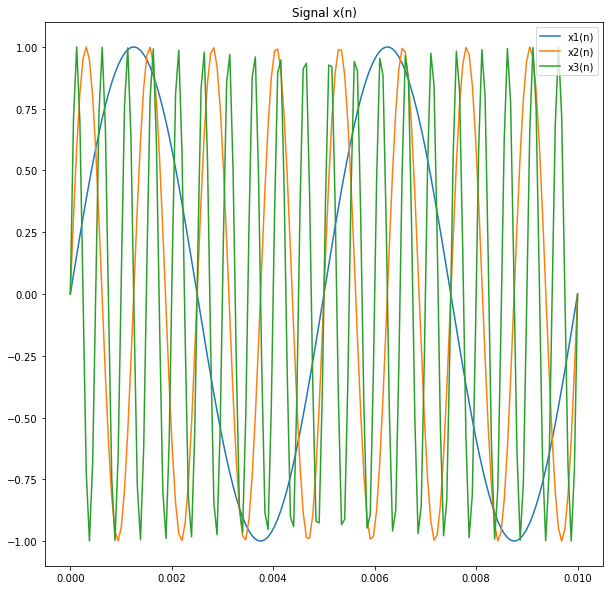

In [2]:
# generate sine wave
fs = 16000
f1 = 200
f2 = 800
f3 = 2000
t_end = 0.01
n = np.linspace(0, t_end, int(t_end*fs))
x_n1 = np.sin(2*np.pi*f1*n)
x_n2 = np.sin(2*np.pi*f2*n)
x_n3 = np.sin(2*np.pi*f3*n)

# plot sine wave
plt.plot(n, x_n1, label="x1(n)")
plt.plot(n, x_n2, label="x2(n)")
plt.plot(n, x_n3, label="x3(n)")
plt.title("Signal x(n)")
plt.legend()
plt.show()

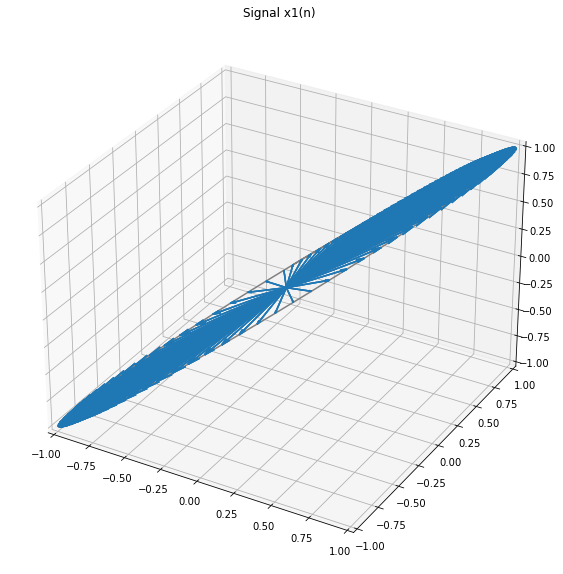

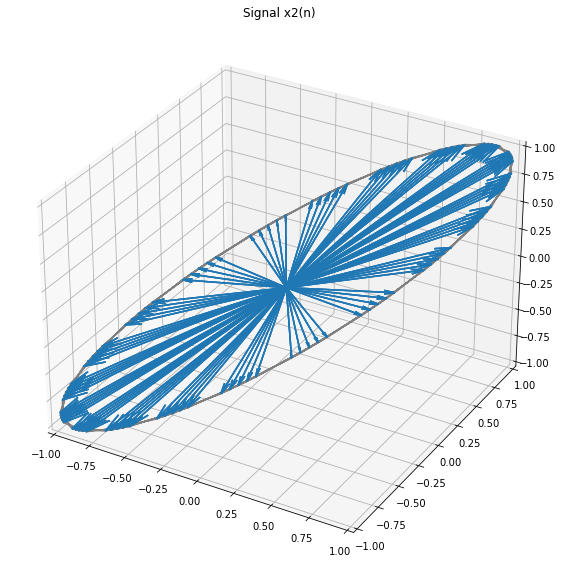

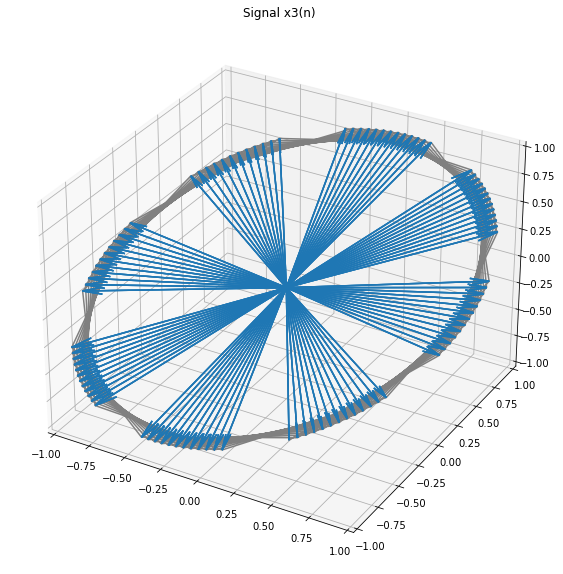

In [3]:
# plot 3D vector space representation of signal
num = 100
origin = [0,0,0]
X, Y, Z = zip(origin,origin,origin) 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(num) :
    U, V, W = zip(x_n1[i:(i+3)])
    ax.quiver(X, Y, Z, U, V, W, arrow_length_ratio=0.1)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
xline = x_n1[0:num]
yline = x_n1[1:(num+1)]
zline = x_n1[2:(num+2)]
ax.plot3D(xline, yline, zline, 'gray')
plt.title("Signal x1(n)")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(100) :
    U, V, W = zip(x_n2[i:(i+3)])
    ax.quiver(X, Y, Z, U, V, W, arrow_length_ratio=0.1)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
xline = x_n2[0:num]
yline = x_n2[1:(num+1)]
zline = x_n2[2:(num+2)]
ax.plot3D(xline, yline, zline, 'gray')
plt.title("Signal x2(n)")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(100) :
    U, V, W = zip(x_n3[i:(i+3)])
    ax.quiver(X, Y, Z, U, V, W, arrow_length_ratio=0.1)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
xline = x_n3[0:num]
yline = x_n3[1:(num+1)]
zline = x_n3[2:(num+2)]
ax.plot3D(xline, yline, zline, 'gray')
plt.title("Signal x3(n)")
plt.show()

As can be seen above, signals with higher frequencies are more sparse than those of lower frequencies. The intuition behind this is a higher frequency signal has less vectors that can fit within a period.

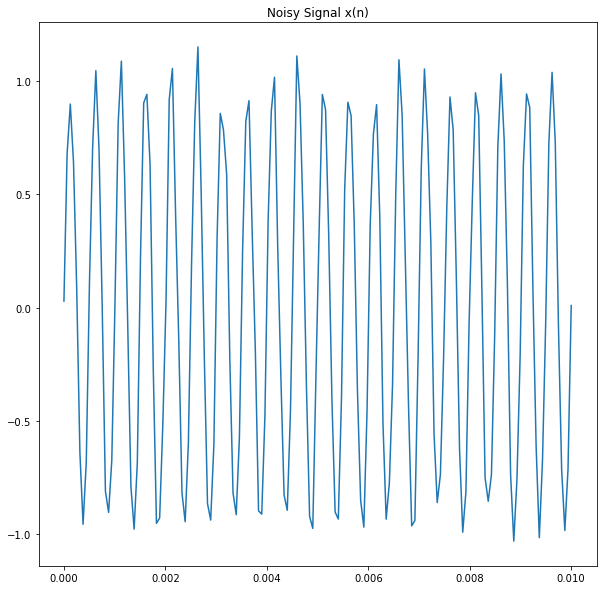

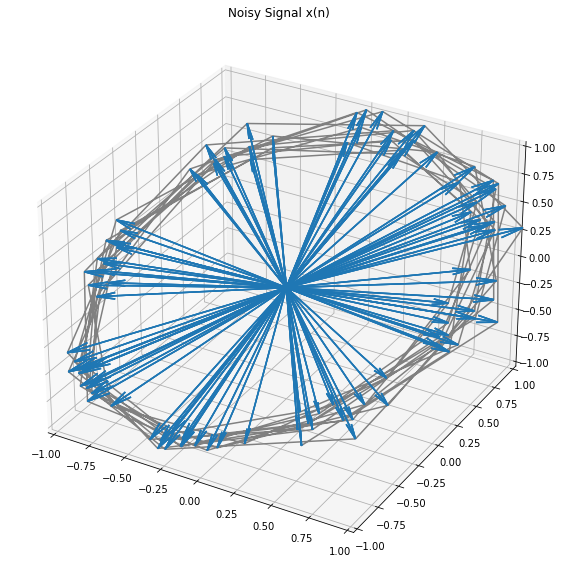

In [4]:
# plot signal with noise
noisy_x = x_n3 + np.random.normal(0, 0.08, np.size(n))
plt.plot(n, noisy_x)
plt.title("Noisy Signal x(n)")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(num) :
    U, V, W = zip(noisy_x[i:(i+3)])
    ax.quiver(X, Y, Z, U, V, W, arrow_length_ratio=0.1)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
xline = noisy_x[0:num]
yline = noisy_x[1:(num+1)]
zline = noisy_x[2:(num+2)]
ax.plot3D(xline, yline, zline, 'gray')
plt.title("Noisy Signal x(n)")
plt.show()

Noisy signals, as is expected, will deviate from the "true" vector and not perfectly reproduce the same path spanned by the vectors with repeated periods.

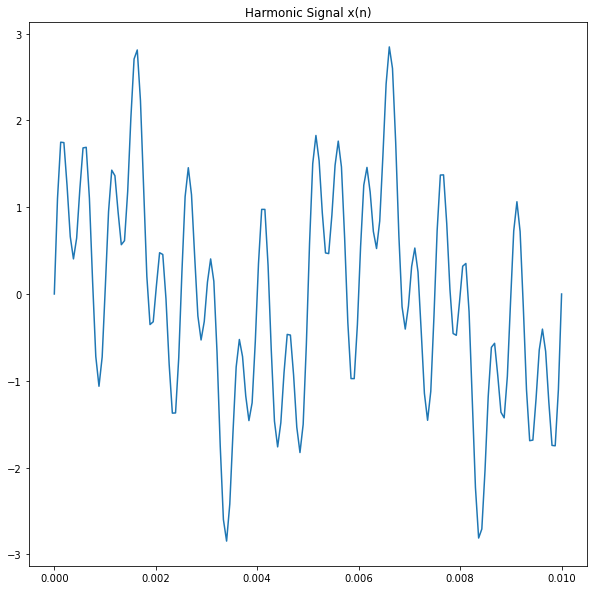

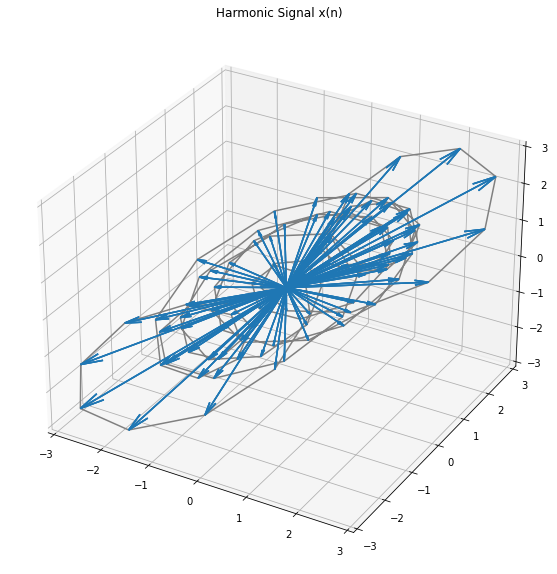

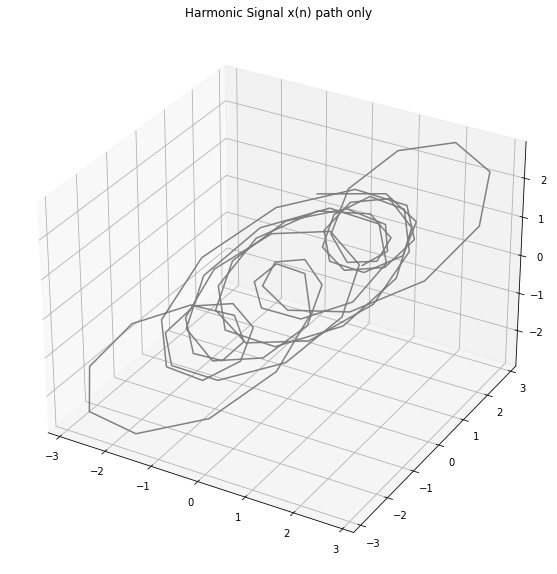

In [5]:
# plot signal with multiple frequency components
harmonic_x = x_n1 + x_n2 + x_n3
plt.plot(n, harmonic_x)
plt.title("Harmonic Signal x(n)")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(num) :
    U, V, W = zip(harmonic_x[i:(i+3)])
    ax.quiver(X, Y, Z, U, V, W, arrow_length_ratio=0.1)
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])
xline = harmonic_x[0:num]
yline = harmonic_x[1:(num+1)]
zline = harmonic_x[2:(num+2)]
ax.plot3D(xline, yline, zline, 'gray')
plt.title("Harmonic Signal x(n)")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(xline, yline, zline, 'gray')
plt.title("Harmonic Signal x(n) path only")
plt.show()

With more frequency components, the more complex the path spanned by the vectors is. With the vectors removed, the seperate frequencies in x(n) become more obvious.

## Convolution as a transform matrix ##

To map one signal to another (or in vector space terms, map a vector space to another), one must perform convolution. Just as we map one vector to another using a matrix, to create the convolution operator we will use a matrix. This matrix will be defined as a (N+K-1) x (N+K-1) matrix with the diagonals spanned by the filter kernel.

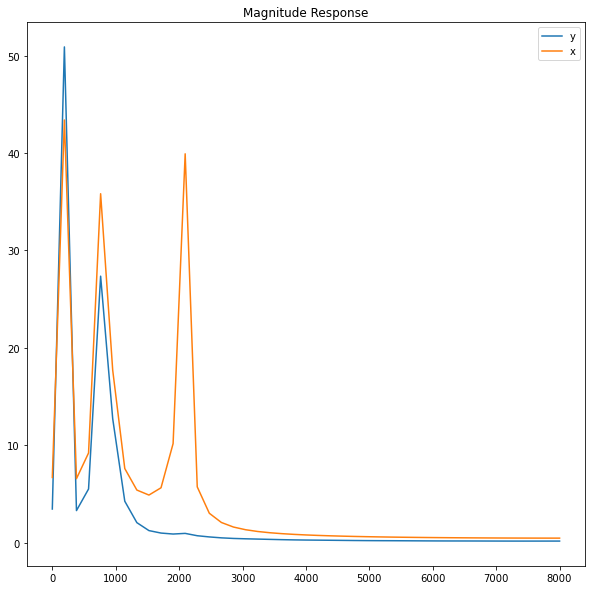

In [6]:
# define kernel to filter out 2000 Hz component
K = 15
N = 86
M = N+K-1
h = np.array([0.011055427525048043,
              0.028047792438000787,
              0.046818046210142496,
              0.07603656864052016,
              0.10213551415292775,
              0.12890374697321205,
              0.1445858930434234,
              0.15225745425026346,
              0.1445858930434234,
              0.12890374697321205,
              0.10213551415292775,
              0.07603656864052016,
              0.046818046210142496,
              0.028047792438000787,
              0.011055427525048043])
x = harmonic_x[0:N]

# define convolution matrix
A = np.zeros((M, N))
for i in range(N) :
    A[i:(i+K), i] = h
    
# perform convolution
y = A@x

# display results
y_fft = fft(y[0:N])[0:N//2]
x_fft = fft(x)[0:N//2]
bins = np.linspace(0.0, fs/2, N//2)

fig, ax = plt.subplots()
ax.plot(bins, np.abs(y_fft), label="y")
ax.plot(bins, np.abs(x_fft), label="x")
plt.title("Magnitude Response")
plt.legend()
plt.show()

As can be seen, the matrix multiplication effectivly performed convolution as the 2000 Hz frequency component is not present

## Wiener Filter in 3D space ##

The Wiener Filter can be thought of as an adaptive filter in which the error between the desired signal d(n) and the transformed input signal y(n)=f(w, x(n)) is minimized w.r.t. an L2 norm. A manifold is created that is spanned by the vectors y(n), and the Wiener solution finds the orthogonal projection of d(n) onto the manifold. Computationally, the weights 'w' that defines such a projection will be computed by the product of the Toeplitz matrix of the autocorrelation of x(n) and the correlation between x(n) and d(n).

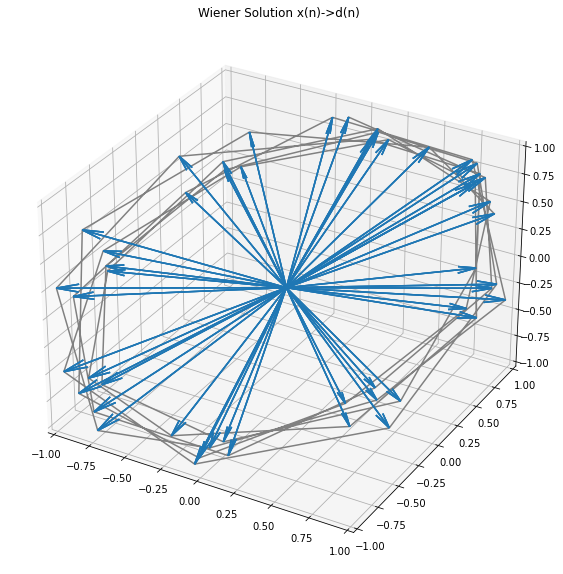

In [7]:
num = 50
lam = 0.001
K = 3

# desired signal is signal without noise
d_n = x_n3
# input signal is signal with noise
x_n = d_n + np.random.normal(0, 0.1, np.size(n))

# define window
x = x_n[0:num]
d = d_n[0:num]
# estimated ACF E[x(n)x(n-k)]
R = np.correlate(x, x, mode='same')[0:K]
# correlation vector P = E[d(n)x(n-i)]
P = np.correlate(d, x, mode='same')[0:K]
# regularized computation of weights
W = np.linalg.inv(toeplitz(R) + lam*np.identity(K))@P
# estimate d(n)
d_hat = np.convolve(x, W, mode='full')

# 3d plot of solution
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(num) :
    U, V, W = zip(x_n[i:(i+3)])
    ax.quiver(X, Y, Z, U, V, W, arrow_length_ratio=0.1)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
xline = x_n[0:num]
yline = x_n[1:(num+1)]
zline = x_n[2:(num+2)]
#ax.plot_surface(W[0], W[1], W[2])
ax.plot3D(xline, yline, zline, 'gray')
plt.title("Wiener Solution x(n)->d(n)")
plt.show()

## Least Mean Squares Filter ##

The Least Mean Squares (LMS) filter uses stochastic gradient descent to descend the performance surface of the data, defined as the cost function J(n) = ||d(n) - y(n)||.

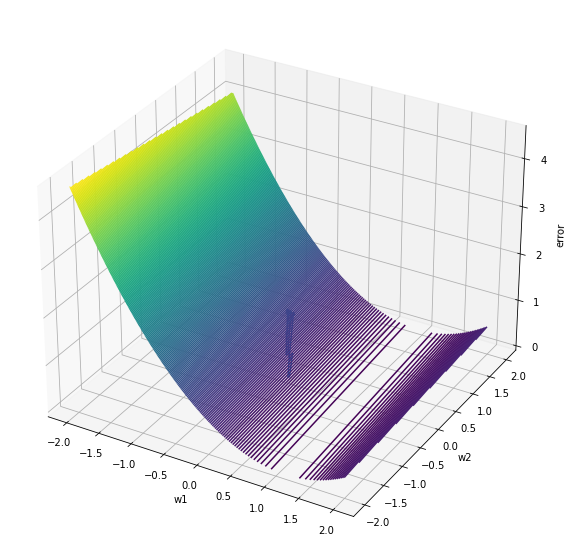

In [8]:
num = 50
mu = 0.01
K = 2

# desired signal is signal without noise
d_n = x_n3
# input signal is signal with noise
x_n = d_n + np.random.normal(0, 0.1, np.size(n))

# plot performance surface
w_1 = np.linspace(-2, 2, 1000)
w_2 = np.linspace(-2, 2, 1000)
e_t = np.zeros([1000,1000])
for i in range(1000) :
    for j in range(1000) :
        e_t[i, j] = (d_n[1] - (w_1[i]*x_n[0] + w_2[j]*x_n[1]))**2
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(w_1, w_2, e_t, 250)
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('error');

# calculate LMS
epochs = 10
w = np.zeros(K)
X = 0
Y = 0
Z = e_t[500, 500]
for index in range(epochs) :
    x_t = x_n[index:index+K]
    d_t = d_n[index+K-1]
    y_t = w.T@x_t
    e = d_t - y_t
    gradient = e*x_t
    w = w + mu*gradient
    U = w[0]
    V = w[1]
    W = e**2
    ax.quiver(X, Y, Z, U, V, W, arrow_length_ratio=0.1)
    X = U
    Y = V
    Z = W